##### Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

###### Data Description :

* Undergrad : person is under graduated or not
* Marital.Status : marital status of a person
* Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
* Work Experience : Work experience of an individual person
* Urban : Whether that person belongs to urban area or not

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree, metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

##### Reading the dataset

In [2]:
fraud = pd.read_csv('Fraud_check.csv')
fraud.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


##### taxable_income <= 30000 as "Risky" and others are "Good"

In [3]:
fraud['Taxable.Income'] = pd.cut(fraud['Taxable.Income'], bins = [0, 30000, 100000], labels = ['Risky', 'Good'])

In [4]:
fraud.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
5,NO,Divorced,Good,116382,0,NO
6,NO,Divorced,Good,80890,8,YES
7,YES,Single,Good,131253,3,YES
8,NO,Single,Good,102481,12,YES
9,YES,Divorced,Good,155482,4,YES


##### Checking the shape of the dataset

In [5]:
fraud.shape

(600, 6)

##### Checking for null values

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    object  
 1   Marital.Status   600 non-null    object  
 2   Taxable.Income   600 non-null    category
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    object  
dtypes: category(1), int64(2), object(3)
memory usage: 24.3+ KB


##### checking for duplicated values

In [7]:
fraud[fraud.duplicated(keep = False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


##### Encode columns in numeric

In [8]:
for column in fraud.columns:
    le = LabelEncoder()
    fraud[column] = le.fit_transform(fraud[column])

In [9]:
fraud.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,0.206667,298.510000,15.558333,0.503333
std,0.500017,0.821958,0.405252,172.823358,8.842147,0.500406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,148.750000,8.000000,0.000000
50%,1.000000,1.000000,0.000000,298.500000,15.000000,1.000000
75%,1.000000,2.000000,0.000000,448.250000,24.000000,1.000000
max,1.000000,2.000000,1.000000,597.000000,30.000000,1.000000


In [10]:
fraud.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,84,10,1
1,1,0,0,398,18,1
2,0,1,0,481,30,1
3,1,2,0,574,15,1
4,0,1,0,4,28,0
5,0,0,0,336,0,0
6,0,0,0,205,8,1
7,1,2,0,390,3,1
8,0,2,0,285,12,1
9,1,0,0,465,4,1


##### Checking the skewness and kurtosis

In [11]:
col = fraud.select_dtypes(exclude = 'object').columns.tolist()

data = fraud[col]
pd.DataFrame(data = [data.skew(), data.kurtosis()],index = ['skewness', 'kurtosis'])

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
skewness,-0.080265,-0.086622,1.452500,0.000031,0.018529,-0.013367
kurtosis,-2.000236,-1.514965,0.110113,-1.203540,-1.167524,-2.006521


##### Correlation 

In [12]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize = (12, 10)) 
    cmap = sns.diverging_palette(240, 10, as_cmap = True)
    _ = sns.heatmap(corr, cmap = cmap, square = True, cbar_kws = {'shrink' : .9}, ax = ax, annot = True, annot_kws = {'fontsize' : 12})

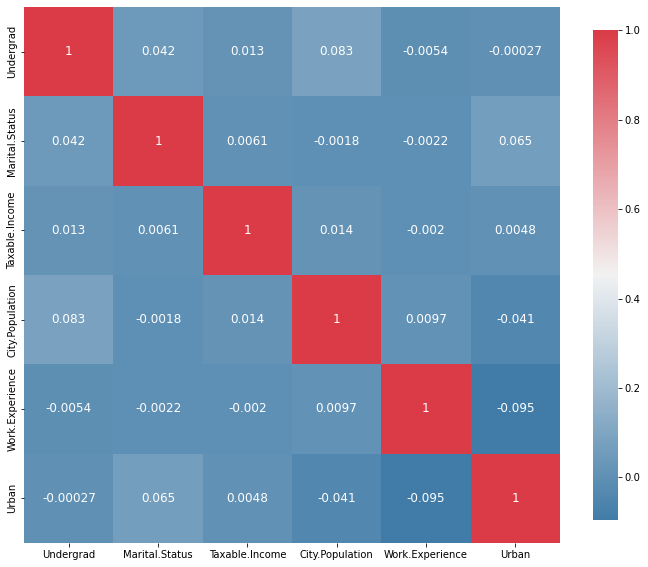

In [13]:
plot_correlation_map(fraud)

In [14]:
fraud.shape

(600, 6)

##### Splitting the data into dependent and indepandent variables.

In [15]:
x = fraud.loc[:, ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']]
y = fraud['Taxable.Income']

##### Splitting the data into test and train

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [17]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(480, 5) (120, 5) (480,) (120,)


In [18]:
y_train.value_counts()

0    382
1     98
Name: Taxable.Income, dtype: int64

##### Building Decision Tree Classifier using entropy criteria

In [19]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

##### Plot the decision tree

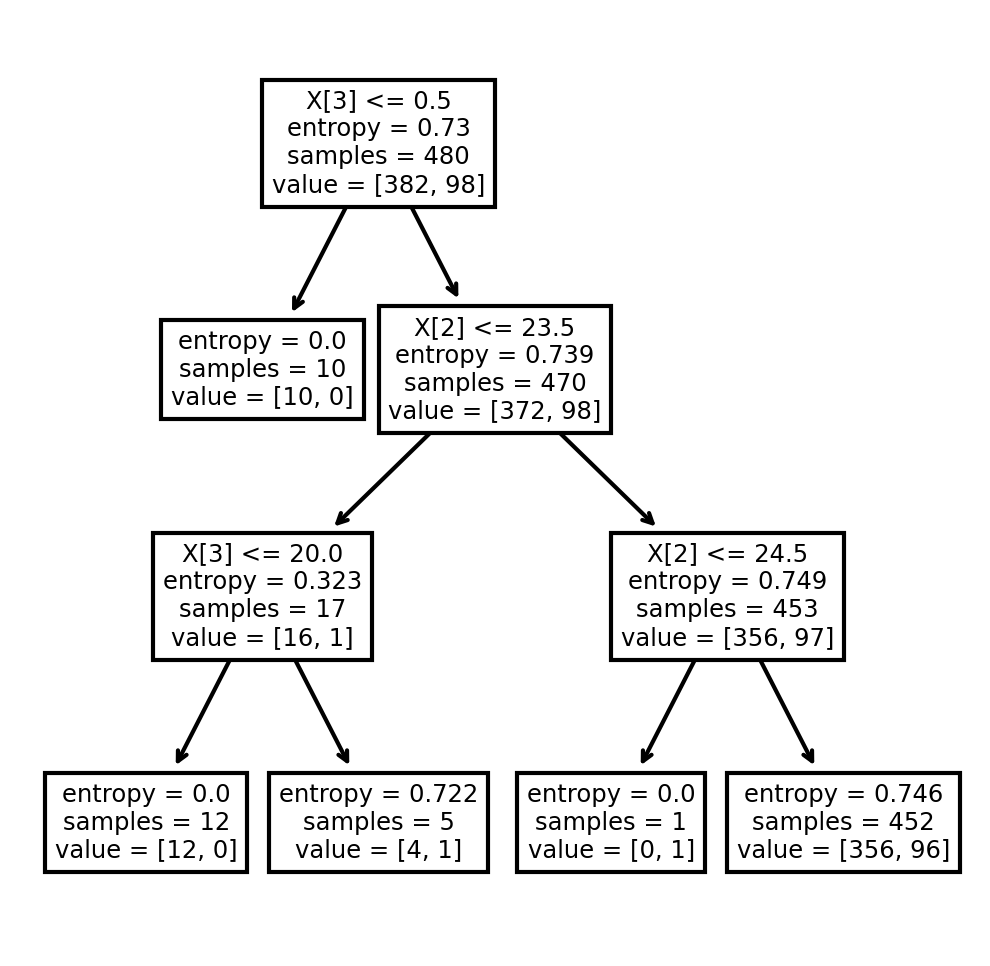

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4), dpi = 300)
tree.plot_tree(model);

##### Visualizing how the data is choosing the root node and how it is built

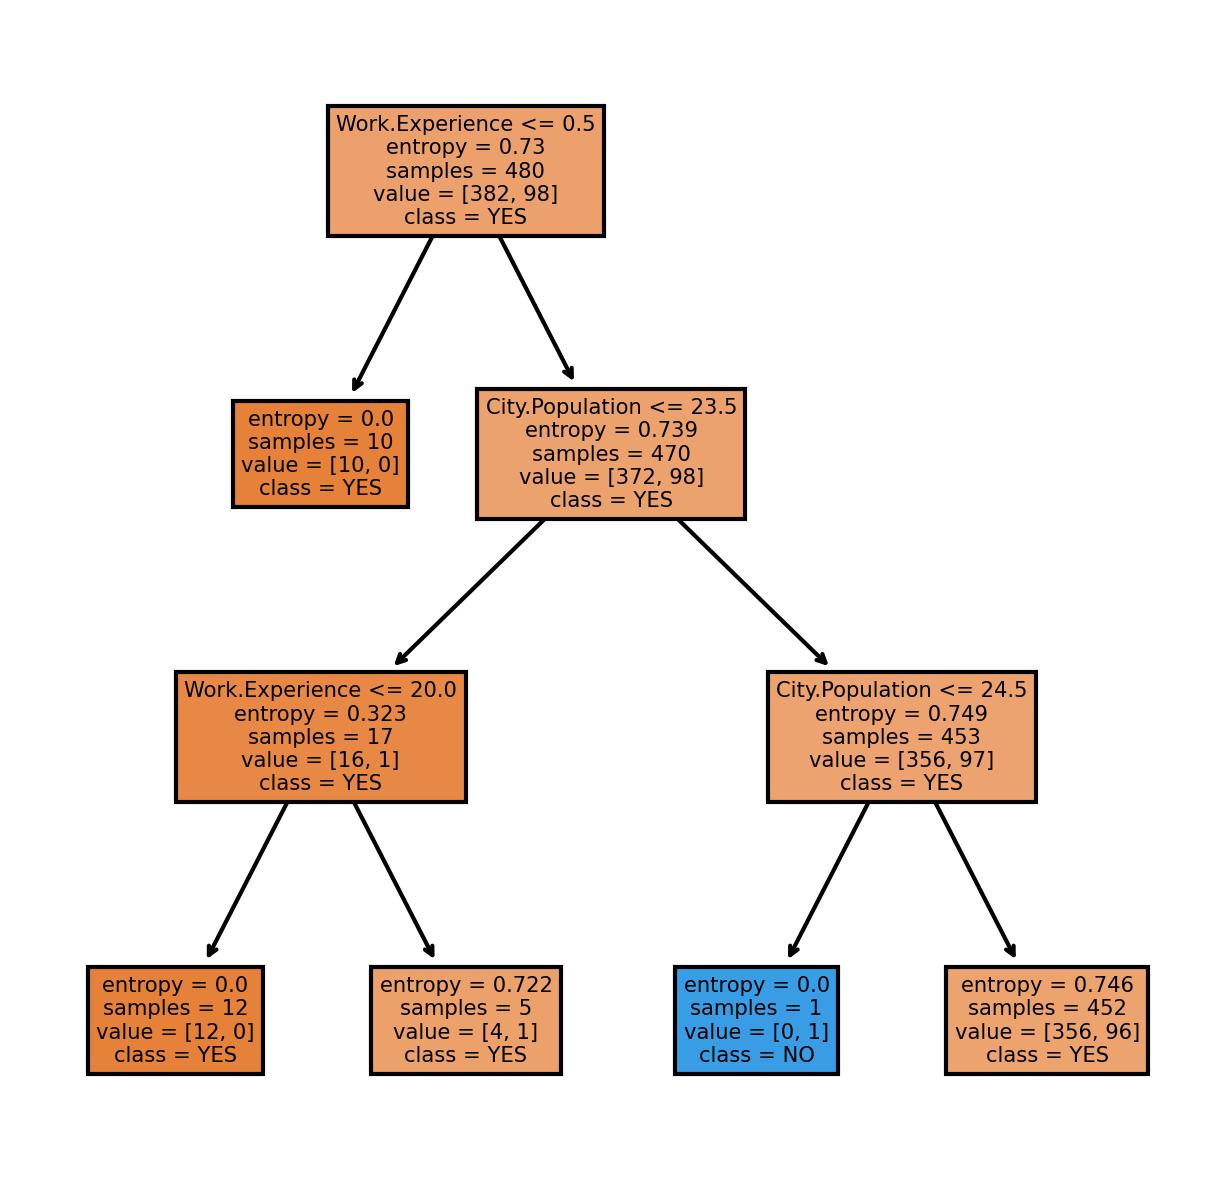

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 300)
tree.plot_tree(model, 
               feature_names = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban'], 
               class_names = ['YES','NO'], 
               filled = True);

##### Checking the score of the training data

In [22]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.7979166666666667

##### Predicting on test data

In [23]:
model_test = model.predict(x_test) #predicting on test data set
pd.Series(model_test).value_counts() #getting the count of each category

0    120
dtype: int64

In [24]:
model_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':model_test})
df

,Actual,Predicted
493,1,0
172,1,0
352,1,0
506,1,0
595,0,0
...,...,...
536,0,0
422,0,0
191,0,0
21,1,0


##### Getting the 2 way table to understand the correct and wrong predictions

In [26]:
pd.crosstab(y_test, model_test)

col_0,0
Taxable.Income,
0,94
1,26


##### Accuracy 

In [27]:
np.mean(model_test == y_test)

0.7833333333333333

##### Plot Function

In [28]:
def plot_confusion_metrix(y_test, model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Wistia)
    classNames = ['YES', 'NO']
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]+"="+str(cm[i][j])))
    plt.show()

In [29]:
def report_performance(model):
    
    model_test = model.predict(x_test)
    
    print('\n\nConfusion Matrix:')
    print('{0}'.format(metrics.confusion_matrix(y_test, model_test)))
    print('\n\nClassification Report:')
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

In [30]:
def roc_curves(model):
    predictions_test = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(predictions_test, y_test)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color = 'darkorange', lw = 1, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()

In [31]:
def accuracy(model):
    pred = model.predict(x_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")

##### Visualization



Confusion Matrix:
[[94  0]
 [26  0]]


Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



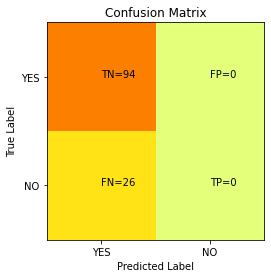

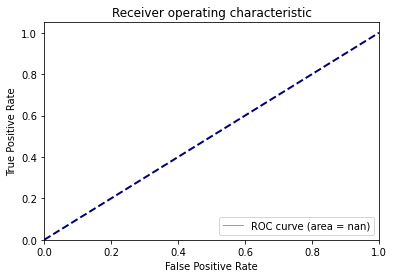


Acuuracy Of the Model:  0.7833333333333333 




In [32]:
report_performance(model) 
roc_curves(model)
accuracy(model)

##### Creating a for loop to identify the train and test accuracies of the prediction, with the change in the max_depth feature of the decision tree classifier from 1 to 11

In [33]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state = 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

##### Listing down the Accuracies in a Dataframe for different max depth classifiers

In [34]:
acc = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
acc

,max_depth,train_acc,test_acc
0,1,0.795833,0.783333
1,2,0.795833,0.783333
2,3,0.797917,0.783333
3,4,0.800000,0.783333
4,5,0.802083,0.775000
5,6,0.806250,0.775000
6,7,0.810417,0.766667
7,8,0.818750,0.750000
8,9,0.833333,0.758333
9,10,0.845833,0.750000


##### Inference

- Maximum test accuracy of 78.33% is when the depth of the Decision Tree is 0, 1, 2, and 3.

##### Visulizing accuracy graph to look over max_depth

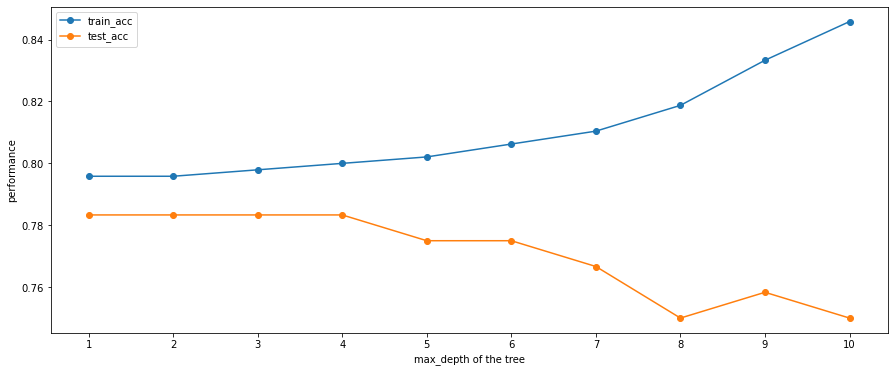

In [35]:
labels = ['train_acc','test_acc']
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot()
plt.plot(acc['max_depth'],acc['train_acc'], marker = 'o')
plt.plot(acc['max_depth'], acc['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

##### Building DecisionTreeClassifier (CART) using Gini Criteris

In [36]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

###### Prediction and computing the accuracy

In [37]:
preds = model_gini.predict(x_test)
np.mean(preds == y_test)

0.7833333333333333

##### Running the DecisionTreeClassifier on whole Data

In [38]:
model_gini = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model_gini.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

##### Predicition and computing the accuracy

In [39]:
preds = model_gini.predict(x)
np.mean(preds == y)

0.7966666666666666

In [40]:
pd.crosstab(y,preds)

col_0,0,1
Taxable.Income,,
0,476,0
1,122,2


##### Decision Tree Regression

In [41]:
model_r = DecisionTreeRegressor()
model_r.fit(x_train, y_train)

DecisionTreeRegressor()

In [42]:
model_r.score(x_train, y_train)

1.0

##### Find the accuracy

In [43]:
model_r.score(x_test, y_test)

-1.454991816693945

##### Inference

- Decision tree classfier gives a good result.
- Decision tree regresser is not an advisable method to classify the salary data

In [44]:
model.feature_importances_

array([0.01879177, 0.12718632, 0.54798138, 0.28310199, 0.02293854])

In [45]:
feature_importances = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_importances

,feature,importance
2,City.Population,0.547981
3,Work.Experience,0.283102
1,Marital.Status,0.127186
4,Urban,0.022939
0,Undergrad,0.018792
